In [1]:
import os.path
from os import path
import pathlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__


'0.16.2'

In [2]:
place_name = "Berlin, Germany"

In [3]:
########### DRIVE ###########        
if path.exists('./test-geo-drive.graphml'):
    print("CHECK DRIVE TRUE")
    graph = ox.io.load_graphml(filepath='test-geo-drive.graphml')
    print("LOAD TRUE")
else:
    print("CHECK DRIVE FALSE")
     #graph3 = ox.graph_from_place(place_name, retain_all=True, custom_filter='["light_rail"="yes"]')
    graph = ox.graph_from_place(place_name, retain_all=True, network_type='drive')
    ox.save_graphml(graph4, filepath='./test-geo-drive.graphml')
    print("SAVE TRUE")
"""
########### WALK ###########
if path.exists('./test-geo-walk.graphml'):
    print("CHECK WALK TRUE")
    graph5 = ox.io.load_graphml(filepath='test-geo-walk.graphml')
    print("LOAD TRUE")
else:
    print("CHECK WALK FALSE")
    graph5 = ox.graph_from_place(place_name, retain_all=True, network_type='walk')
    ox.save_graphml(graph5, filepath='./test-geo-walk.graphml')
    print("SAVE TRUE")
        
########### BIG ###########
if path.exists('./test-geo-big.graphml'):
    print("CHECK BIG TRUE")
    graphbig = ox.io.load_graphml(filepath='test-geo-big.graphml')
    print("LOAD TRUE")
else:
    print("CHECK BIG FALSE")
    graphbig = ox.graph_from_place(place_name, retain_all=True)
    ox.save_graphml(graphbig, filepath='./test-geo-big.graphml') 
    print("SAVE TRUE")
"""

    
# custom_filter='["bus"="yes"]')
# custom_filter='["psv"="yes"]

CHECK DRIVE TRUE
LOAD TRUE


'\n########### WALK ###########\nif path.exists(\'./test-geo-walk.graphml\'):\n    print("CHECK WALK TRUE")\n    graph5 = ox.io.load_graphml(filepath=\'test-geo-walk.graphml\')\n    print("LOAD TRUE")\nelse:\n    print("CHECK WALK FALSE")\n    graph5 = ox.graph_from_place(place_name, retain_all=True, network_type=\'walk\')\n    ox.save_graphml(graph5, filepath=\'./test-geo-walk.graphml\')\n    print("SAVE TRUE")\n        \n########### BIG ###########\nif path.exists(\'./test-geo-big.graphml\'):\n    print("CHECK BIG TRUE")\n    graphbig = ox.io.load_graphml(filepath=\'test-geo-big.graphml\')\n    print("LOAD TRUE")\nelse:\n    print("CHECK BIG FALSE")\n    graphbig = ox.graph_from_place(place_name, retain_all=True)\n    ox.save_graphml(graphbig, filepath=\'./test-geo-big.graphml\') \n    print("SAVE TRUE")\n'

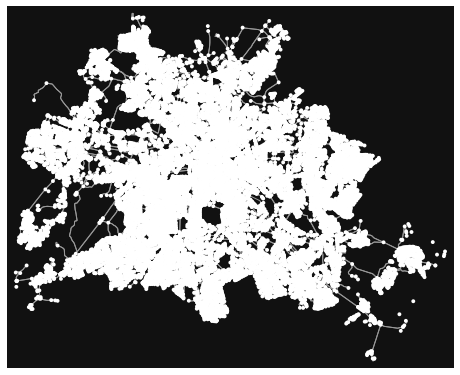

<Figure size 432x288 with 0 Axes>

In [4]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [5]:
#deskriptive ANaylse der des Weges von einem Punkt
def make_spatial_points(graph, y, x):
    gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
    
    ##Zentraler Knoten von dem ich starten will
    center_node = ox.get_nearest_node(graph, (y, x))
    
    ##trip Time
    trip_times = [5, 10, 15, 20, 25] #in minutes
    
    #travel_speed = 4.5 #walking speed in km/hour
    # add an edge attribute for time in minutes required to traverse each edge
    #meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
    #for u, v, k, data in G.edges(data=True, keys=True):
        #data['time'] = data['length'] / meters_per_minute
    ##generierung der Farben die als Hex zurück geben werden 
    iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
    
    node_colors = {}
    
    #Berechnung und einfärbung je nach Erreichbarkeit ! via Time
    for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
        subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            node_colors[node] = color
    #Einfärbung der nicht erreichbarkeit bzw. IF THEN none 
    nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
    #Entfernung bzw. ummerierung der nicht erreichbaren punkte bzw. IF THEN none 
    ns = [15 if node in node_colors else 0 for node in graph.nodes()]
    
    gdf_nodes["color"] = nc
    gdf_nodes["spatial"] = ns
    
    return gdf_nodes#[["y","x","color","spatial"]]#, gdf_nodes[["y","x","osmid","ref","geometry"]]

In [6]:
#deskriptive ANaylse der des Weges von einem Punkt
def make_spatial_points_withSpeed(graph, y, x, travel_speed):
    gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
    
    ##Zentraler Knoten von dem ich starten will
    center_node = ox.get_nearest_node(graph, (y, x))
    
    ##trip Time
    trip_times = [5, 10, 15, 20, 25] #in minutes
    
    
    # add an edge attribute for time in minutes required to traverse each edge
    meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
    for u, v, k, data in graph.edges(data=True, keys=True):
        data['time'] = data['length'] / meters_per_minute
    ##generierung der Farben die als Hex zurück geben werden 
    iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
    
    node_colors = {}
    
    #Berechnung und einfärbung je nach Erreichbarkeit ! via Time
    for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
        subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            node_colors[node] = color
    #Einfärbung der nicht erreichbarkeit bzw. IF THEN none 
    nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
    #Entfernung bzw. ummerierung der nicht erreichbaren punkte bzw. IF THEN none 
    ns = [15 if node in node_colors else 0 for node in graph.nodes()]
    
    gdf_nodes["color"] = nc
    gdf_nodes["spatial"] = ns
    
    return gdf_nodes#[["y","x","color","spatial"]]#, gdf_nodes[["y","x","osmid","ref","geometry"]]

In [7]:
#deskriptive ANaylse der des Weges von einem Punkt
def make_spatial_points_FastestSpeed(graph, y, x):
    gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
    
    ##Zentraler Knoten von dem ich starten will
    center_node = ox.get_nearest_node(graph, (y, x))
    
    ##trip Time
    trip_times = [5, 10, 15, 20, 25] #in minutes
    
    
    # add an edge attribute for time in minutes required to traverse each edge
    #meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
    for u, v, k, data in graph.edges(data=True, keys=True):
        try:
            speed = (float(data['maxspeed']) * 1000 / 60)
        except:
            pass
        data['time'] = data['length'] / speed
    ##generierung der Farben die als Hex zurück geben werden 
    iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
    
    node_colors = {}
    
    #Berechnung und einfärbung je nach Erreichbarkeit ! via Time
    for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
        subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            node_colors[node] = color
    #Einfärbung der nicht erreichbarkeit bzw. IF THEN none 
    nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
    #Entfernung bzw. ummerierung der nicht erreichbaren punkte bzw. IF THEN none 
    ns = [15 if node in node_colors else 0 for node in graph.nodes()]
    
    gdf_nodes["color"] = nc
    gdf_nodes["spatial"] = ns
    
    return gdf_nodes#[["y","x","color","spatial"]]#, gdf_nodes[["y","x","osmid","ref","geometry"]]

In [8]:
gdf_smart = make_spatial_points(graph,52.474240, 13.599249)
gdf_smart1 = make_spatial_points_withSpeed(graph,52.474240, 13.599249, 50.0)
gdf_smart2 = make_spatial_points_FastestSpeed(graph,52.474240, 13.599249)

In [9]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(graph)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

1125612250.53135

In [24]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 28141,
 'm': 73192,
 'k_avg': 5.201805195266693,
 'intersection_count': 24677,
 'streets_per_node_avg': 3.012010944884688,
 'streets_per_node_counts': {0: 0,
  1: 3481,
  2: 302,
  3: 16965,
  4: 7290,
  5: 117,
  6: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.12369851817632635,
  2: 0.010731672648448883,
  3: 0.6028570413276003,
  4: 0.2590526278383853,
  5: 0.004157634767776554,
  6: 0.0002132120393731566},
 'edge_length_total': 10679671.499999855,
 'edge_length_avg': 145.9130984260555,
 'street_length_total': 6140015.628999994,
 'street_length_avg': 144.91764330052618,
 'street_segments_count': 42369,
 'node_density_km': 25.000616319443864,
 'intersection_density_km': 21.92318001900843,
 'edge_density_km': 9487.877814903375,
 'street_density_km': 5454.823031733685,
 'circuity_avg': 1.0396576292584319,
 'self_loop_proportion': 0.0022953328232593728,
 'clean_intersection_count': 19553,
 'clean_intersection_density_km': 17.37099075704793}

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

# Viel zu viel compute Power nötig

In [8]:
# see more stats (mostly topological stuff) with extended_stats
statslist = []
"""
more_stats = ox.extended_stats(graph, ecc=True, bc=True, cc=True) #use arguments to turn other toplogical analyses on/off
for key in sorted(more_stats.keys()):
    print(key)
    statslist.append(key)
"""

'\nmore_stats = ox.extended_stats(graph, ecc=True, bc=True, cc=True) #use arguments to turn other toplogical analyses on/off\nfor key in sorted(more_stats.keys()):\n    print(key)\n    statslist.append(key)\n'

In [ ]:
statslist

In [ ]:
more_stats['radius']

In [ ]:
for i in range(len(more_stats)):
    print(more_stats[statslist[i]])

# Hie kann es wieder weitergehen

In [8]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(graph, filepath='./test-geo-drive-v2.gpkg')
ox.save_graphml(graph, filepath='./test-geo-drive-v2.graphml')

In [39]:
# convert graph to line graph so edges become nodes and vice versa
#edge_centrality = nx.closeness_centrality(nx.line_graph(graph))
#nx.set_edge_attributes(graph, edge_centrality, 'edge_centrality')

/home/micha/anaconda3/envs/geo/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# color edges in original graph with closeness centralities from line graph
#ec = ox.plot.get_edge_colors_by_attr(graph, 'edge_centrality', cmap='inferno')
#fig, ax = ox.plot_graph(graph, edge_color=ec, edge_linewidth=2, node_size=0)

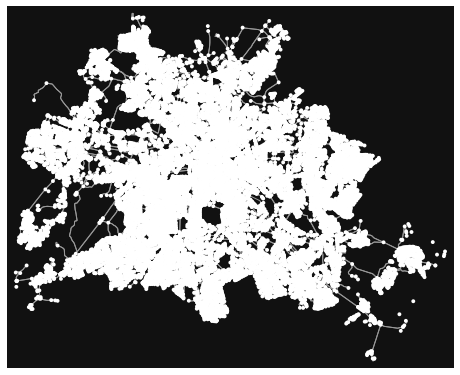

In [5]:
fig, ax = ox.plot_graph(graph,
    ax=None,               #optionally draw on pre-existing axis
    figsize=(8, 8),        #figure size to create if ax is None
    bgcolor="#111111",     #background color of the plot
    node_color="w",        #color of the nodes
    node_size=15,          #size of the nodes: if 0, skip plotting them
    node_alpha=None,       #opacity of the nodes
    node_edgecolor="none", #color of the nodes' markers' borders
    node_zorder=1,         #zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot nodes below edges
    edge_color="#999999",  #color of the edges
    edge_linewidth=1,      #width of the edges: if 0, skip plotting them
    edge_alpha=None,       #opacity of the edges
    show=True,             #if True, call pyplot.show() to show the figure
    close=False,           #if True, call pyplot.close() to close the figure: useful if plotting/saving many in a loop
    save=False,            #if True, save figure to disk at filepath
    filepath=None,         #if save is True, the path to the file
    dpi=300,               #if save is True, the resolution of saved file
    bbox=None)             #bounding box to constrain plot: if None, will calculate from spatial extents of graph

In [12]:
from shapely.geometry import Point, LineString, Polygon

In [13]:
trip_times = [5, 10, 15, 20, 25] #in minutes
travel_speed = 50 #walking speed in km/hour


In [17]:
gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy
center_node = ox.get_nearest_node(graph, (y[0], x[0]))
graph = ox.project_graph(graph)

In [18]:
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in graph.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

In [19]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)

## SPATIAL SPEZIAL ANALYSE (WHITE AND "HOTSPOTS")

### TAKE THE POINTS IN 10-15MINUTES AND ROUTE THE FASTES WAY TO THE "EDGE NODES" AND SUM ALL LENGTH FROM SHORTEST ROUTES

Aufnahme und Aggregierung der einzelnen Routen und deren Länge ... der Durschschnitt aller erreichbaren Punkte gibt ein Gewicht ob es sich um einen Whitespot oder ggf. um einen 
"Hotspot" handelt ... gegebenfalls die Routen in einem zwischen schritt als LINESTRING speichern

### COMBINE DIFFERNT GRAPHES WITH DIFFERENT SPATIAL DISTANZES AND MEDIUM

Wichtig ist ggf. andere Graphen (öpnv, private, bicycle whatever!!) zu kombinieren zwecks Umstieg oder Gewichtung und Handicap für das jeweilige Medium

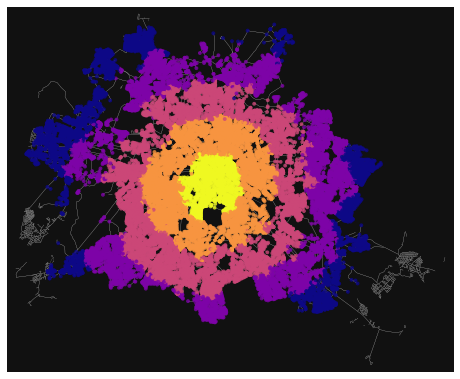

In [23]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
ns = [15 if node in node_colors else 0 for node in graph.nodes()]
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns, node_alpha=0.8,
                        edge_linewidth=0.2, edge_color='#999999')

## Transformation from Points to Polygons

In [21]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

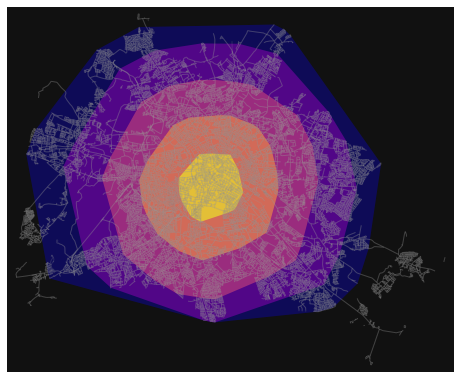

In [22]:
# plot the network then add isochrones as colored descartes polygon patches
fig, ax = ox.plot_graph(graph, show=False, close=False, edge_color='#999999', edge_alpha=0.2, node_size=0)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [35]:
trip_times = [5, 10, 15, 20, 25] #in minutes
travel_speed = 50 #walking speed in km/hour

In [36]:
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys



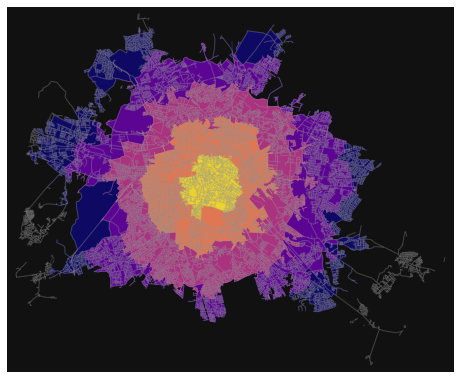

In [37]:
isochrone_polys = make_iso_polys(graph, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(graph, show=False, close=False, edge_color='#999999', edge_alpha=0.2, node_size=0)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.7, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [38]:
isochrone_polys

In [54]:
from IPython.display import Image

/home/micha/anaconda3/envs/geo/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 1024

# specify that we're retrieving building footprint geometries
tags = {'building': True}

In [ ]:
%%time
gdf = ox.geometries_from_place('Berlin, Germany', tags)
gdf_proj = ox.project_gdf(gdf)
fp = f'./{img_folder}/B-MRZ.{extension}'
fig, ax = ox.plot_footprints(gdf_proj, filepath=fp, dpi=600, save=True, show=False, close=True)
Image(fp, height=size, width=size)

/home/micha/anaconda3/envs/geo/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
